In [2]:
import load
import oed
import figure

In [3]:
# jsonファイルの読み込み
result = load.load_result_json("../result/Result.json")

gene = result[0]["gene"]

N, M, theta, w_on, w_off, w, g, w_osc, w_nmj = oed.weight(gene)
alpha, x_peak, y_peak, dt, T, f, v, time, tau = oed.constant("setting")
N_, M_, f_inv, T_ = oed.time_constant_step(gene, "setting")

# figure.trajectory(gene, 10)
# figure.newron_output(gene)

# figure.Bearing_vs_Turing_bias("../output/b_vs_t.txt", "../figure/Bearing_vs_Turing_bias.png")
# figure.Normal_gradient_vs_Turing_bias("../output/n_vs_t.txt", "../figure/Normal_gradient_vs_Turing_bias")
# figure.Translational_gradient_vs_Turing_bias("../output/t_vs_t.txt", "../figure/Translational_gradient_vs_Turing_bias")
# figure.trajectory(gene, 10, "../figure/Trajectory_colorbar")

TypeError: ConnectionStyle.Angle3.__init__() got an unexpected keyword argument 'rad'

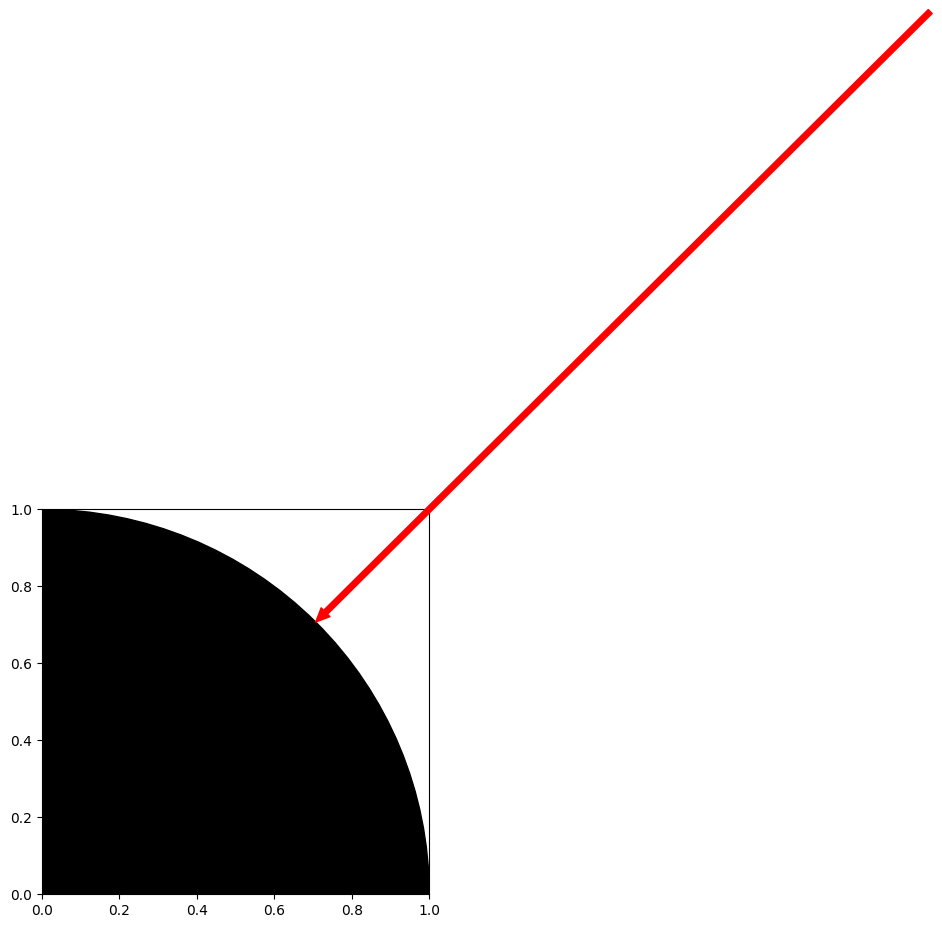

In [25]:
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import FancyArrowPatch
import numpy as np

fig, ax = plt.subplots(figsize=(5,5))

chemosensory_newrons = [(3, 9), (6, 9)]
AIY = [(3,6),(6,6)]
inter_newrons = [(3,6),(6,6),(3,3),(6,3)]
motor_newrons = [(0,0),(3,0),(6,0),(9,0)]

# 円の作成
# 感覚ニューロン
for center in chemosensory_newrons:
    circle = patches.Circle(xy=center, radius=1, facecolor="white", edgecolor="black")
    ax.add_patch(circle)

# 介在ニューロン
for center in inter_newrons:
    circle = patches.Circle(xy=center, radius=1, facecolor="gray", edgecolor="black")
    ax.add_patch(circle)

# 運動ニューロン
for center in motor_newrons:
    circle = patches.Circle(xy=center, radius=1, facecolor="black", edgecolor="black")
    ax.add_patch(circle)

# 矢印の作成
headwidth = 9
headlength = 10
width = 4
inv_root_2 = 1/np.sqrt(2)

positive_color = "red"
negative_color = "blue"

# 感覚ニューロン
chemosensory_annotations = [{"start":(chemosensory_newrons[0][0],chemosensory_newrons[0][1]-1),"end" :(chemosensory_newrons[0][0], chemosensory_newrons[0][1] - 2),"weight":gene[8]},
                            {"start":(chemosensory_newrons[1][0],chemosensory_newrons[1][1]-1),"end" :(chemosensory_newrons[1][0], chemosensory_newrons[1][1] - 2),"weight":gene[11]},
                            {"start":(chemosensory_newrons[0][0]+inv_root_2,chemosensory_newrons[0][1]-inv_root_2),"end":(inter_newrons[1][0]-inv_root_2,inter_newrons[1][1]+inv_root_2),"weight":gene[9]},
                            {"start":(chemosensory_newrons[1][0]-inv_root_2,chemosensory_newrons[1][1]-inv_root_2),"end":(inter_newrons[0][0]+inv_root_2,inter_newrons[0][1]+inv_root_2),"weight":gene[10]}
                            ]

for annotation in chemosensory_annotations:
    if annotation["weight"] >0:
        color = positive_color
    else:
        color = negative_color
    ax.annotate("", xy=annotation["end"], xytext=annotation["start"],
                arrowprops=dict(shrink=0, width=np.abs(annotation["weight"])*width, headwidth=headwidth,
                                headlength=headlength, connectionstyle='arc3',
                                facecolor=color, edgecolor=color))

# 介在ニューロン
inter_annotations = [{"start":(inter_newrons[0][0],inter_newrons[0][1]-1),"end":(inter_newrons[0][0],inter_newrons[0][1]-2),"weight":gene[12]},
                    {"start":(inter_newrons[1][0],inter_newrons[1][1]-1),"end":(inter_newrons[1][0],inter_newrons[1][1]-2),"weight":gene[13]},
                    {"start":(inter_newrons[2][0],inter_newrons[2][1]-1),"end":(inter_newrons[2][0],inter_newrons[2][1]-2),"weight":gene[14]},
                    {"start":(inter_newrons[3][0],inter_newrons[3][1]-1),"end":(inter_newrons[3][0],inter_newrons[3][1]-2),"weight":gene[15]},
                    {"start":(inter_newrons[2][0]-inv_root_2,inter_newrons[2][1]-inv_root_2),"end":(motor_newrons[0][0]+inv_root_2,motor_newrons[0][1]+inv_root_2),"weight":gene[14]},
                    {"start":(inter_newrons[3][0]+inv_root_2,inter_newrons[3][1]-inv_root_2),"end":(motor_newrons[3][0]-inv_root_2,motor_newrons[3][1]+inv_root_2),"weight":gene[15]},

                    ]

for annotation in inter_annotations:
    if annotation["weight"] >0:
        color = positive_color
    else:
        color = negative_color
    ax.annotate("", xy=annotation["end"], xytext=annotation["start"],
                arrowprops=dict(shrink=0, width=np.abs(annotation["weight"])*width, headwidth=headwidth,
                                headlength=headlength, connectionstyle="arc3",
                                facecolor=color, edgecolor=color))

# 運動ニューロン
motor_annotations = [{"start":(motor_newrons[0][0]-inv_root_2,motor_newrons[0][1]+inv_root_2),"end":(motor_newrons[0][0]+inv_root_2,motor_newrons[0][1]+inv_root_2),"weight":gene[16]},
                    
                    ]

for annotation in motor_annotations:
    if annotation["weight"] >0:
        color = positive_color
    else:
        color = negative_color
    ax.annotate("", xy=annotation["end"], xytext=annotation["start"],
                arrowprops=dict(shrink=0, width=np.abs(annotation["weight"])*width, headwidth=headwidth,
                                headlength=headlength, connectionstyle="arc3, rad=-1",
                                facecolor=color, edgecolor=color))

ax.axis("off")
ax.autoscale()
ax.set_aspect("equal")
plt.show()

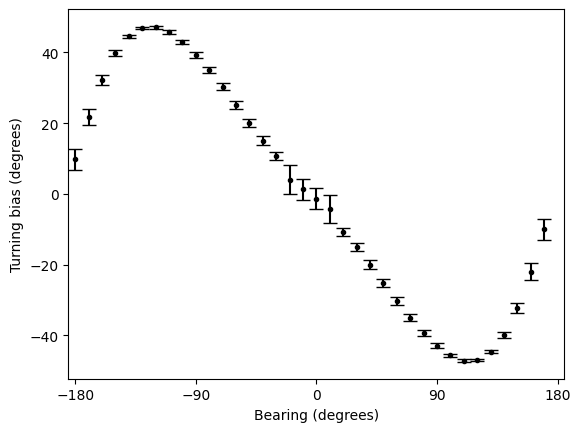

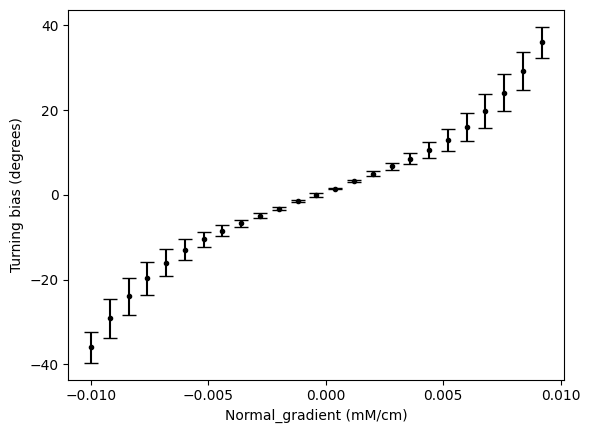

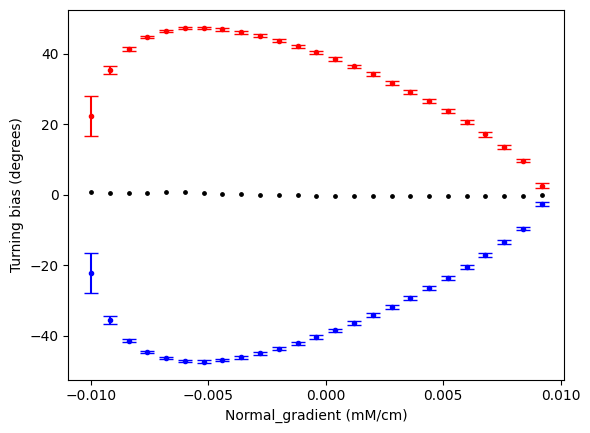

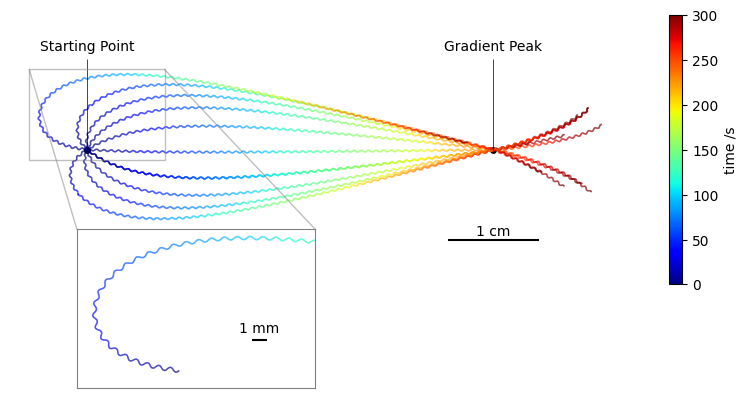

In [3]:
figure.Bearing_vs_Turing_bias(
    "../output/b_vs_t.txt", "../figure/Bearing_vs_Turing_bias.png"
)

figure.Normal_gradient_vs_Turing_bias(
    "../output/n_vs_t.txt", "../figure/Normal_gradient_vs_Turing_bias"
)

figure.Translational_gradient_vs_Turing_bias(
    "../output/t_vs_t.txt", "../figure/Translational_gradient_vs_Turing_bias"
)

figure.trajectory(gene, 10, "../figure/Trajectory_colorbar")